<hr style="border:3px solid black"></hr>

# Template for PESLearn to create ML model with sparse PES

    - Read  :  https://github.com/CCQC/PES-Learn
    - Paper :  https://doi.org/10.1021/acs.jctc.9b00312

<hr style="border:3px solid black"></hr>

<hr style="border:2px solid black"></hr>

## Import libraries and prepare input data

    - Example Input  : Required changes must be made in the code directly. [green]
    - User Input     : Run the cell directly. The required input must be enter via keyboard. [cyan]
    - Example Output : Describes the output of the cell. [indigo]

<hr style="border:2px solid black"></hr>

In [1]:
import warnings # sometimes there are just too many warnings in PESLearn (with conda install)
warnings.filterwarnings("ignore")
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import os
import peslearn  # imports peslearn package

In [2]:
# creating required folders
input_dir = os.getcwd()+'/'

out_plots = input_dir + 'plots/'
if not os.path.exists(out_plots):
    os.makedirs(out_plots)
out_data = input_dir + 'data/'
if not os.path.exists(out_data):
    os.makedirs(out_data)

# set directory of ML files
out_peslearn = input_dir + 'peslearn_out/'
if not os.path.exists(out_peslearn):
    os.makedirs(out_peslearn)

<hr style="border:2px solid black"></hr>

### Import input data
Import data can contain any number of input but must have only one output (Energy) in Hartree!
***
<span style="color:green"><u> Example Input _[via code]_ </u></span>
   
    Input name: 0_inp_4D_PES_sparse.dat    # sparse PES filename
    Separation: ,                          # separation for data
    Header = None                          # remove any header in file (put appropriate header below in names=)
    Names: R,a1,a2,a3,E                    # header for 4 input (use any name) and 1 output (Do not change E)
***
<span style="color:indigo"><u> Example Output</u></span>
   
       Prints contents of df_res (DataFrame containing sparse input PES) 
***    
!! Only use capital E for energy! For rest of the header, any name can be used !!
<hr style="border:2px solid black"></hr>

In [3]:
print("Prepare input in dataframe format (R1,R2..,A1,A2..,E) without header!")
print("PESLearn takes energy input in Hartree! Do not use kcal/mol, cm^{-1}, etc.")

print("\n")

df_res = pd.read_csv(input_dir+'0_inp_4D_PES_sparse.dat',sep= ',',header=None,names=['R','a1','a2','a3','E'] )    
df_res

Prepare input in dataframe format (R1,R2..,A1,A2..,E) without header!
PESLearn takes energy input in Hartree! Do not use kcal/mol, cm^{-1}, etc.




,R,a1,a2,a3,E
0,3.7,0,0,0,-186.546770
1,3.9,0,0,0,-186.568048
2,4.0,0,0,0,-186.574590
3,4.1,0,0,0,-186.579297
4,4.2,0,0,0,-186.582646
...,...,...,...,...,...
6467,16.0,90,90,180,-186.588924
6468,17.0,90,90,180,-186.588924
6469,18.0,90,90,180,-186.588924
6470,19.0,90,90,180,-186.588924


<hr style="border:2px solid black"></hr>

### Set E_inf (Energy at infinity) ; 
***
<span style="color:green"><u> Example Input _[via code]_</u></span>
    
    E_inf: -186.5889239 (At 50 Angstrom)
<span style="color:DarkCyan"><u> User Input _[via keyboard]_ </u></span>    
    
    scaling: 5   
***    
- Scaling does not change input for PESLearn. <br>
- Remember: PESLearn takes input in Hartrees.<br>
- E_inf (Energy at infinity) is needed for trimming very high energy points i.e. for visualization purpose only. <br>
<hr style="border:2px solid black"></hr>

In [4]:
# Enter energy at infinity
E_inf = -186.5889239

# select correct scaling (User input)
Scales = [1,1000.0,27.211399,2625.5002,627.5096080,219474.63]
Scale_name = ['Ha.','mHa.','eV','kJ/mol','kcal/mol','cm⁻¹']

print(Scale_name)
print ("Enter 0-5 for scaling: \n 0 --> No scaling \n 5 --> cm^{-1}:")
scaling = int(input("\n Enter scaling factor for trimming (visualization purpose only)! \n "))

if (scaling > 5):
    print("Invalid Scaling! Taking cm^{-1} as Default")
    scaling = 5
    
y_scale = Scale_name[scaling]
scal_param = Scales[scaling]

# coverting R to bohr
conver_au = 1.8897259886  # angstrom to bohr (available to use: optional)



['Ha.', 'mHa.', 'eV', 'kJ/mol', 'kcal/mol', 'cm⁻¹']
Enter 0-5 for scaling: 
 0 --> No scaling 
 5 --> cm^{-1}:

 Enter scaling factor for trimming (visualization purpose only)! 
 5

 Enter Energy at infinity (R) 
 -186.5889239


<hr style="border:2px solid black"></hr>

### Trim very high energy points 
***
<span style="color:darkcyan"><u> User Input _[via keyboard]_ </u></span>    
   
    Guess: 5650 
    replot with new guess: 0 = No; 1 = Yes
***
<span style="color:indigo"><u> Example Output</u></span>
    
    Plots df_pl_trim (minima + asymptotic partition) and df_pl_he dataframes (high energy partition)
    
    All plots are saved in /plots
    Partitioned data (df_pl_trim and df_pl_he) are saved in /data
***    

The given example is run with three guess values 6000, 5800, 5650. <br>

The code automatically saves the last partition.
<hr style="border:2px solid black"></hr>

The total number of points in dataset:  6472
The below plot (row number vs E) is for dataframe i.e. sorted by Energy!
The initial part show minimum region, middle region shows asymptotic region and       final part shows high energy region.

 Enter the number of points to be retained in minima region                      (Any guess < total data points) : 
 6000


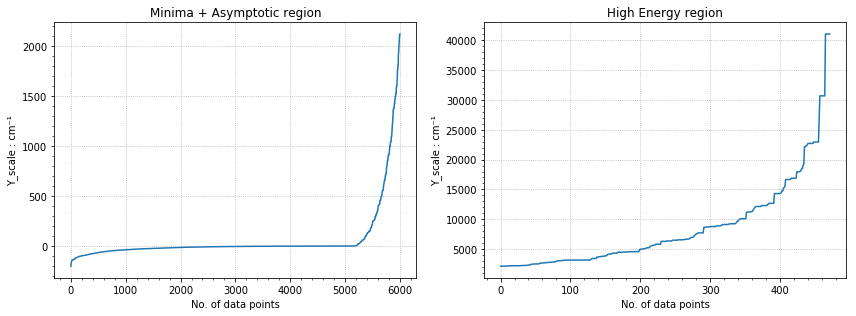


 Do you want to replot with new guess: 
 0 --> No 
 1 --> Yes 
1

 Enter the number of points to be retained in minima region                      (Any guess < total data points) : 
 5800


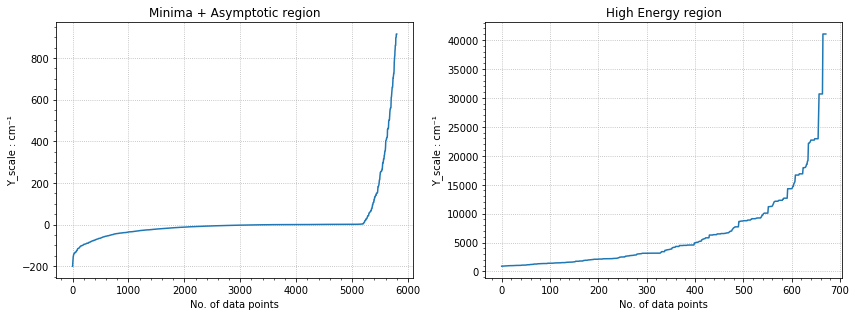


 Do you want to replot with new guess: 
 0 --> No 
 1 --> Yes 
1

 Enter the number of points to be retained in minima region                      (Any guess < total data points) : 
 5650


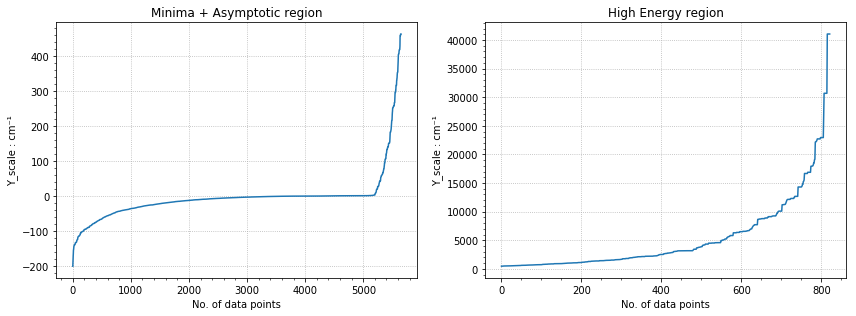


 Do you want to replot with new guess: 
 0 --> No 
 1 --> Yes 
0
Num of data points after trimming =  5650

 Do you want to save the partitioned data (0=No, 1 = Yes) : 
 1
Partioned data Saved !


In [5]:
# visualizing to removing high energy data points
print("The total number of points in dataset: ", df_res.shape[0])

print("The below plot (row number vs E) is for dataframe i.e. sorted by Energy!")
print("The initial part show minimum region, middle region shows asymptotic region and \
      final part shows high energy region.")
# SORTING BY ENERGY (NEEDED FOR SMOOTH CONVERGANCE IN PESLEARN)
df_pl = df_res.sort_values(by='E')

def pl_trim_vis(df_pl_tri,df_pl_h,trim,Ef,sp,yn,i):
    
    z1 = (df_pl_tri.E.to_numpy()-Ef)*sp
    x1 = np.arange(len(z1))
    z2 = (df_pl_h.E.to_numpy()-Ef)*sp
    x2 = np.arange(len(z2))
    plt.figure(figsize=(12,4.5))
    
    plt.subplot(1,2,1)
    plt.plot(x1,z1)
    plt.grid(True,linestyle=':')
    plt.minorticks_on() 
    plt.ylabel('Y_scale : ' + yn)
    plt.xlabel('No. of data points')
    plt.title("Minima + Asymptotic region")
    
    plt.subplot(1,2,2)
    plt.plot(x2,z2)
    plt.grid(True,linestyle=':')
    plt.minorticks_on()
    plt.ylabel('Y_scale : ' + yn)   
    plt.xlabel('No. of data points')
    plt.title("High Energy region")
    plt.savefig(out_plots+'HE_trimming_{}.eps'.format(i), format='eps')

    plt.tight_layout()
    plt.show()
    
replot = 1
i=1
while (replot != 0):
    trim = int(input("\n Enter the number of points to be retained in minima region \
                     (Any guess < total data points) : \n "))    
    df_pl_trim = df_pl.iloc[:trim].reset_index(drop = True)
    df_pl_he = df_pl.iloc[trim:].reset_index(drop = True)
    pl_trim_vis(df_pl_trim,df_pl_he,trim,E_inf,scal_param,y_scale,i)  
    replot = int(input("\n Do you want to replot with new guess: \n 0 --> No \n 1 --> Yes \n"))
    i+=1

print("Num of data points after trimming = ", trim)

# saving partitioned data
df_pl_trim.to_csv(out_data + "minima_asym_partition.dat", sep='\t', float_format='%.10f')
df_pl_he.to_csv(out_data +"high_E_partition.dat", sep='\t', float_format='%.10f')
print("Partioned data Saved !")

<hr style="border:2px solid black"></hr>

### PESLearn path and parameters

Example: NN model is created using df_pl_trim data.

***
<span style="color:green"><u> Example Input</u></span>    
   
    filename_n : "PESL.dat"                         # Final code reads data saved in this variable
    df_pl_trim.to_csv(out_peslearn+"PESL.dat".....  # change df_pl_trim to df_pl_he for High Energy model
    Save partitioned data: 0 = No; 1 = Yes
***
<span style="color:indigo"><u> Example Output</u></span>
    
    Prints coordinates at global minimum (To be used in "eq_geom" parameter in PESLearn) 
***    

<hr style="border:2px solid black"></hr>



In [7]:
# saving trimmed PES data in out_PESlearn folder
filename_n = "PESL.dat"
df_pl_trim.to_csv(out_peslearn+"PESL.dat", index=None,sep=',')

# changing path to PESLearn folder and saving trimmed PES file (to be used for creating ML model)

os.chdir(input_dir)    # goes to original path! In case this tab is run twice by mistake
os.chdir(out_peslearn) # changes path to where PESLearn model will be created (declared at beginning)

# visualize energy minimum (enter value in model parameters (optional)!)
print(df_pl_trim[df_pl_trim.E == df_pl_trim.E.min()])

     R  a1  a2  a3           E
0  3.2   0  90  90 -186.589835


<hr style="border:2px solid black"></hr>

## This part can be re-run multiple times to create several ML models with different parameters
`Rerun only after current model is optimised and saved!`
***
<span style="color:green"><u> Example Input _[via code]_ </u></span>   
#### model parameters 
    80:10:10  (training: testing: validation)                       --> for NN
    1000-2000 (training) or 80% (training), whichever is lower      --> for GP 
    Sampling - Default: structure_based
Rest of the parameters can be found here:<br>
https://github.com/CCQC/PES-Learn/blob/f066b2a480cb96e82695fdbe234724ba7be20f21/3_Keywords/keywords.md
***
<span style="color:darkcyan"><u> User Input _[via keyboard]_ </u></span>    
   
    Using_NN: 1             # Enter 1 for NN and any other number for GP

<hr style="border:2px solid black"></hr>

In [10]:
# input parameters

Using_NN = int(input("\n Enter 1 for creating NN model and any other number for GP : \n "))

if (Using_NN == 1):
    input_string = ("""
                   pes_format=zmat
                   use_pips = false
                   ml_model = nn
                   training_points = 4520  
                   validation_points = 565 
                   nn_precision = 64
                   eq_geom      : [3.2,0,90,90]
                   n_low_energy_train = 1
                   hp_maxit = 5  
                   """)
else: 
    input_string = ("""
                   pes_format=zmat
                   use_pips = false
                   ml_model = gp
                   hp_maxit = 20   
                   training_points = 1000
                   eq_geom      : [3.2,0,90,90]
                   n_low_energy_train = 1
                   gp_ard=opt
                   """)

input_obj = peslearn.InputProcessor(input_string)



 Enter 1 for creating NN model and any other number for GP : 
 1


<hr style="border:2px solid black"></hr>

### Create model
***
<span style="color:indigo"><u> Example Output</u></span>
    
    Prints PESLearn output for optimising and saving ML models.

<hr style="border:2px solid black"></hr>

In [11]:
if Using_NN == 1 :
    nn = peslearn.ml.NeuralNetwork(filename_n, input_obj)
    nn.optimize_model()
else: 
    gp = peslearn.ml.GaussianProcess(filename_n, input_obj)
    gp.optimize_model()

Training with 4520 points. Validating with 565 points. Full dataset contains 5650 points.
Using structure_based training set point sampling.
Errors are root-mean-square error in wavenumbers (cm-1)

Performing neural architecture search...

Hidden layer structure:  (16,)
Hyperparameters:  {'morse_transform': {'morse': False}, 'scale_X': {'scale_X': 'std', 'activation': 'tanh'}, 'scale_y': 'std', 'pip': {'degree_reduction': False, 'pip': False}, 'layers': (16,)}
Test set RMSE (cm-1): 11.15  Validation set RMSE (cm-1): 12.66 Full dataset RMSE (cm-1):  8.89
Hidden layer structure:  (32,)
Hyperparameters:  {'morse_transform': {'morse': False}, 'scale_X': {'scale_X': 'std', 'activation': 'tanh'}, 'scale_y': 'std', 'pip': {'degree_reduction': False, 'pip': False}, 'layers': (32,)}
Test set RMSE (cm-1):  7.41  Validation set RMSE (cm-1):  8.45 Full dataset RMSE (cm-1):  5.74
Hidden layer structure:  (64,)
Hyperparameters:  {'morse_transform': {'morse': False}, 'scale_X': {'scale_X': 'std', 'ac

Test set RMSE (cm-1):  0.16  Validation set RMSE (cm-1):  0.18 Full dataset RMSE (cm-1):  0.09
Hyperparameters:  {'layers': (64, 64, 64, 64), 'morse_transform': {'morse': False}, 'pip': {'pip': False}, 'scale_X': {'activation': 'tanh', 'scale_X': 'std'}, 'scale_y': 'std', 'lr': 0.6}
Test set RMSE (cm-1):  0.26  Validation set RMSE (cm-1):  0.28 Full dataset RMSE (cm-1):  0.20
Hyperparameters:  {'layers': (64, 64, 64, 64), 'morse_transform': {'morse': False}, 'pip': {'pip': False}, 'scale_X': {'activation': 'tanh', 'scale_X': 'std'}, 'scale_y': 'std', 'lr': 0.5}
Test set RMSE (cm-1):  0.26  Validation set RMSE (cm-1):  0.29 Full dataset RMSE (cm-1):  0.23
Hyperparameters:  {'layers': (64, 64, 64, 64), 'morse_transform': {'morse': False}, 'pip': {'pip': False}, 'scale_X': {'activation': 'tanh', 'scale_X': 'std'}, 'scale_y': 'std', 'lr': 0.4}
Test set RMSE (cm-1):  0.07  Validation set RMSE (cm-1):  0.07 Full dataset RMSE (cm-1):  0.03
Hyperparameters:  {'layers': (64, 64, 64, 64), 'morse

Epoch 173 Validation RMSE (cm-1):  0.44
Epoch 174 Validation RMSE (cm-1):  0.44
Epoch 175 Validation RMSE (cm-1):  0.43
Epoch 176 Validation RMSE (cm-1):  0.42
Epoch 177 Validation RMSE (cm-1):  0.42
Epoch 178 Validation RMSE (cm-1):  0.41
Epoch 179 Validation RMSE (cm-1):  0.41
Epoch 180 Validation RMSE (cm-1):  0.40
Epoch 181 Validation RMSE (cm-1):  0.39
Epoch 182 Validation RMSE (cm-1):  0.39
Epoch 183 Validation RMSE (cm-1):  0.39
Epoch 184 Validation RMSE (cm-1):  0.38
Epoch 185 Validation RMSE (cm-1):  0.38
Epoch 186 Validation RMSE (cm-1):  0.38
Epoch 187 Validation RMSE (cm-1):  0.37
Epoch 188 Validation RMSE (cm-1):  0.36
Epoch 189 Validation RMSE (cm-1):  0.36
Epoch 190 Validation RMSE (cm-1):  0.36
Epoch 191 Validation RMSE (cm-1):  0.36
Epoch 192 Validation RMSE (cm-1):  0.37
Epoch 193 Validation RMSE (cm-1):  0.37
Epoch 194 Validation RMSE (cm-1):  0.37
Epoch 195 Validation RMSE (cm-1):  0.37
Epoch 196 Validation RMSE (cm-1):  0.37
Epoch 197 Validation RMSE (cm-1):  0.36


Epoch 378 Validation RMSE (cm-1):  0.22
Epoch 379 Validation RMSE (cm-1):  0.22
Epoch 380 Validation RMSE (cm-1):  0.22
Epoch 381 Validation RMSE (cm-1):  0.22
Epoch 382 Validation RMSE (cm-1):  0.22
Epoch 383 Validation RMSE (cm-1):  0.22
Epoch 384 Validation RMSE (cm-1):  0.23
Epoch 385 Validation RMSE (cm-1):  0.22
Epoch 386 Validation RMSE (cm-1):  0.22
Epoch 387 Validation RMSE (cm-1):  0.22
Epoch 388 Validation RMSE (cm-1):  0.22
Epoch 389 Validation RMSE (cm-1):  0.22
Epoch 390 Validation RMSE (cm-1):  0.22
Epoch 391 Validation RMSE (cm-1):  0.22
Epoch 392 Validation RMSE (cm-1):  0.22
Epoch 393 Validation RMSE (cm-1):  0.22
Epoch 394 Validation RMSE (cm-1):  0.22
Epoch 395 Validation RMSE (cm-1):  0.22
Epoch 396 Validation RMSE (cm-1):  0.22
Epoch 397 Validation RMSE (cm-1):  0.22
Epoch 398 Validation RMSE (cm-1):  0.22
Epoch 399 Validation RMSE (cm-1):  0.22
Epoch 400 Validation RMSE (cm-1):  0.22
Epoch 401 Validation RMSE (cm-1):  0.22
Epoch 402 Validation RMSE (cm-1):  0.21


Epoch 583 Validation RMSE (cm-1):  0.18
Epoch 584 Validation RMSE (cm-1):  0.18
Epoch 585 Validation RMSE (cm-1):  0.18
Epoch 586 Validation RMSE (cm-1):  0.18
Epoch 587 Validation RMSE (cm-1):  0.18
Epoch 588 Validation RMSE (cm-1):  0.18
Epoch 589 Validation RMSE (cm-1):  0.18
Epoch 590 Validation RMSE (cm-1):  0.18
Epoch 591 Validation RMSE (cm-1):  0.18
Epoch 592 Validation RMSE (cm-1):  0.18
Epoch 593 Validation RMSE (cm-1):  0.18
Epoch 594 Validation RMSE (cm-1):  0.18
Epoch 595 Validation RMSE (cm-1):  0.18
Epoch 596 Validation RMSE (cm-1):  0.18
Epoch 597 Validation RMSE (cm-1):  0.18
Epoch 598 Validation RMSE (cm-1):  0.18
Epoch 599 Validation RMSE (cm-1):  0.18
Epoch 600 Validation RMSE (cm-1):  0.18
Epoch 601 Validation RMSE (cm-1):  0.18
Epoch 602 Validation RMSE (cm-1):  0.18
Epoch 603 Validation RMSE (cm-1):  0.18
Epoch 604 Validation RMSE (cm-1):  0.18
Epoch 605 Validation RMSE (cm-1):  0.18
Epoch 606 Validation RMSE (cm-1):  0.18
Epoch 607 Validation RMSE (cm-1):  0.17


Epoch 788 Validation RMSE (cm-1):  0.16
Epoch 789 Validation RMSE (cm-1):  0.16
Epoch 790 Validation RMSE (cm-1):  0.16
Epoch 791 Validation RMSE (cm-1):  0.16
Epoch 792 Validation RMSE (cm-1):  0.16
Epoch 793 Validation RMSE (cm-1):  0.16
Epoch 794 Validation RMSE (cm-1):  0.16
Epoch 795 Validation RMSE (cm-1):  0.16
Epoch 796 Validation RMSE (cm-1):  0.16
Epoch 797 Validation RMSE (cm-1):  0.16
Epoch 798 Validation RMSE (cm-1):  0.16
Epoch 799 Validation RMSE (cm-1):  0.16
Epoch 800 Validation RMSE (cm-1):  0.16
Epoch 801 Validation RMSE (cm-1):  0.16
Epoch 802 Validation RMSE (cm-1):  0.16
Epoch 803 Validation RMSE (cm-1):  0.16
Epoch 804 Validation RMSE (cm-1):  0.16
Epoch 805 Validation RMSE (cm-1):  0.16
Epoch 806 Validation RMSE (cm-1):  0.16
Epoch 807 Validation RMSE (cm-1):  0.16
Epoch 808 Validation RMSE (cm-1):  0.16
Epoch 809 Validation RMSE (cm-1):  0.16
Epoch 810 Validation RMSE (cm-1):  0.15
Epoch 811 Validation RMSE (cm-1):  0.15
Epoch 812 Validation RMSE (cm-1):  0.15


Epoch 993 Validation RMSE (cm-1):  0.14
Epoch 994 Validation RMSE (cm-1):  0.14
Epoch 995 Validation RMSE (cm-1):  0.14
Epoch 996 Validation RMSE (cm-1):  0.14
Epoch 997 Validation RMSE (cm-1):  0.14
Epoch 998 Validation RMSE (cm-1):  0.14
Epoch 999 Validation RMSE (cm-1):  0.14
Epoch 1000 Validation RMSE (cm-1):  0.14
Epoch 1001 Validation RMSE (cm-1):  0.14
Epoch 1002 Validation RMSE (cm-1):  0.14
Epoch 1003 Validation RMSE (cm-1):  0.14
Epoch 1004 Validation RMSE (cm-1):  0.14
Epoch 1005 Validation RMSE (cm-1):  0.14
Epoch 1006 Validation RMSE (cm-1):  0.14
Epoch 1007 Validation RMSE (cm-1):  0.14
Epoch 1008 Validation RMSE (cm-1):  0.14
Epoch 1009 Validation RMSE (cm-1):  0.14
Epoch 1010 Validation RMSE (cm-1):  0.14
Epoch 1011 Validation RMSE (cm-1):  0.14
Epoch 1012 Validation RMSE (cm-1):  0.14
Epoch 1013 Validation RMSE (cm-1):  0.14
Epoch 1014 Validation RMSE (cm-1):  0.14
Epoch 1015 Validation RMSE (cm-1):  0.14
Epoch 1016 Validation RMSE (cm-1):  0.14
Epoch 1017 Validation R

Epoch 1193 Validation RMSE (cm-1):  0.12
Epoch 1194 Validation RMSE (cm-1):  0.12
Epoch 1195 Validation RMSE (cm-1):  0.12
Epoch 1196 Validation RMSE (cm-1):  0.12
Epoch 1197 Validation RMSE (cm-1):  0.12
Epoch 1198 Validation RMSE (cm-1):  0.12
Epoch 1199 Validation RMSE (cm-1):  0.12
Epoch 1200 Validation RMSE (cm-1):  0.12
Epoch 1201 Validation RMSE (cm-1):  0.12
Epoch 1202 Validation RMSE (cm-1):  0.12
Epoch 1203 Validation RMSE (cm-1):  0.12
Epoch 1204 Validation RMSE (cm-1):  0.12
Epoch 1205 Validation RMSE (cm-1):  0.12
Epoch 1206 Validation RMSE (cm-1):  0.12
Epoch 1207 Validation RMSE (cm-1):  0.12
Epoch 1208 Validation RMSE (cm-1):  0.12
Epoch 1209 Validation RMSE (cm-1):  0.12
Epoch 1210 Validation RMSE (cm-1):  0.12
Epoch 1211 Validation RMSE (cm-1):  0.12
Epoch 1212 Validation RMSE (cm-1):  0.12
Epoch 1213 Validation RMSE (cm-1):  0.12
Epoch 1214 Validation RMSE (cm-1):  0.12
Epoch 1215 Validation RMSE (cm-1):  0.12
Epoch 1216 Validation RMSE (cm-1):  0.12
Epoch 1217 Valid

Epoch 1393 Validation RMSE (cm-1):  0.11
Epoch 1394 Validation RMSE (cm-1):  0.11
Epoch 1395 Validation RMSE (cm-1):  0.11
Epoch 1396 Validation RMSE (cm-1):  0.11
Epoch 1397 Validation RMSE (cm-1):  0.11
Epoch 1398 Validation RMSE (cm-1):  0.11
Epoch 1399 Validation RMSE (cm-1):  0.11
Epoch 1400 Validation RMSE (cm-1):  0.11
Epoch 1401 Validation RMSE (cm-1):  0.11
Epoch 1402 Validation RMSE (cm-1):  0.11
Epoch 1403 Validation RMSE (cm-1):  0.11
Epoch 1404 Validation RMSE (cm-1):  0.11
Epoch 1405 Validation RMSE (cm-1):  0.11
Epoch 1406 Validation RMSE (cm-1):  0.11
Epoch 1407 Validation RMSE (cm-1):  0.11
Epoch 1408 Validation RMSE (cm-1):  0.11
Epoch 1409 Validation RMSE (cm-1):  0.11
Epoch 1410 Validation RMSE (cm-1):  0.11
Epoch 1411 Validation RMSE (cm-1):  0.11
Epoch 1412 Validation RMSE (cm-1):  0.11
Epoch 1413 Validation RMSE (cm-1):  0.11
Epoch 1414 Validation RMSE (cm-1):  0.11
Epoch 1415 Validation RMSE (cm-1):  0.11
Epoch 1416 Validation RMSE (cm-1):  0.11
Epoch 1417 Valid

Epoch 1593 Validation RMSE (cm-1):  0.10
Epoch 1594 Validation RMSE (cm-1):  0.10
Epoch 1595 Validation RMSE (cm-1):  0.10
Epoch 1596 Validation RMSE (cm-1):  0.10
Epoch 1597 Validation RMSE (cm-1):  0.10
Epoch 1598 Validation RMSE (cm-1):  0.10
Epoch 1599 Validation RMSE (cm-1):  0.10
Epoch 1600 Validation RMSE (cm-1):  0.10
Epoch 1601 Validation RMSE (cm-1):  0.10
Epoch 1602 Validation RMSE (cm-1):  0.10
Epoch 1603 Validation RMSE (cm-1):  0.10
Epoch 1604 Validation RMSE (cm-1):  0.10
Epoch 1605 Validation RMSE (cm-1):  0.10
Epoch 1606 Validation RMSE (cm-1):  0.10
Epoch 1607 Validation RMSE (cm-1):  0.10
Epoch 1608 Validation RMSE (cm-1):  0.10
Epoch 1609 Validation RMSE (cm-1):  0.10
Epoch 1610 Validation RMSE (cm-1):  0.10
Epoch 1611 Validation RMSE (cm-1):  0.10
Epoch 1612 Validation RMSE (cm-1):  0.10
Epoch 1613 Validation RMSE (cm-1):  0.10
Epoch 1614 Validation RMSE (cm-1):  0.10
Epoch 1615 Validation RMSE (cm-1):  0.10
Epoch 1616 Validation RMSE (cm-1):  0.10
Epoch 1617 Valid

Epoch 1793 Validation RMSE (cm-1):  0.09
Epoch 1794 Validation RMSE (cm-1):  0.09
Epoch 1795 Validation RMSE (cm-1):  0.09
Epoch 1796 Validation RMSE (cm-1):  0.09
Epoch 1797 Validation RMSE (cm-1):  0.09
Epoch 1798 Validation RMSE (cm-1):  0.09
Epoch 1799 Validation RMSE (cm-1):  0.09
Epoch 1800 Validation RMSE (cm-1):  0.09
Epoch 1801 Validation RMSE (cm-1):  0.09
Epoch 1802 Validation RMSE (cm-1):  0.09
Epoch 1803 Validation RMSE (cm-1):  0.09
Epoch 1804 Validation RMSE (cm-1):  0.09
Epoch 1805 Validation RMSE (cm-1):  0.09
Epoch 1806 Validation RMSE (cm-1):  0.09
Epoch 1807 Validation RMSE (cm-1):  0.09
Epoch 1808 Validation RMSE (cm-1):  0.09
Epoch 1809 Validation RMSE (cm-1):  0.09
Epoch 1810 Validation RMSE (cm-1):  0.09
Epoch 1811 Validation RMSE (cm-1):  0.09
Epoch 1812 Validation RMSE (cm-1):  0.09
Epoch 1813 Validation RMSE (cm-1):  0.09
Epoch 1814 Validation RMSE (cm-1):  0.09
Epoch 1815 Validation RMSE (cm-1):  0.09
Epoch 1816 Validation RMSE (cm-1):  0.09
Epoch 1817 Valid

Epoch 1993 Validation RMSE (cm-1):  0.09
Epoch 1994 Validation RMSE (cm-1):  0.09
Epoch 1995 Validation RMSE (cm-1):  0.09
Epoch 1996 Validation RMSE (cm-1):  0.09
Epoch 1997 Validation RMSE (cm-1):  0.09
Epoch 1998 Validation RMSE (cm-1):  0.09
Epoch 1999 Validation RMSE (cm-1):  0.09
Epoch 2000 Validation RMSE (cm-1):  0.09
Epoch 2001 Validation RMSE (cm-1):  0.09
Epoch 2002 Validation RMSE (cm-1):  0.09
Epoch 2003 Validation RMSE (cm-1):  0.09
Epoch 2004 Validation RMSE (cm-1):  0.09
Epoch 2005 Validation RMSE (cm-1):  0.09
Epoch 2006 Validation RMSE (cm-1):  0.09
Epoch 2007 Validation RMSE (cm-1):  0.09
Epoch 2008 Validation RMSE (cm-1):  0.09
Epoch 2009 Validation RMSE (cm-1):  0.09
Epoch 2010 Validation RMSE (cm-1):  0.09
Epoch 2011 Validation RMSE (cm-1):  0.09
Epoch 2012 Validation RMSE (cm-1):  0.09
Epoch 2013 Validation RMSE (cm-1):  0.09
Epoch 2014 Validation RMSE (cm-1):  0.09
Epoch 2015 Validation RMSE (cm-1):  0.09
Epoch 2016 Validation RMSE (cm-1):  0.09
Epoch 2017 Valid

Epoch 2193 Validation RMSE (cm-1):  0.08
Epoch 2194 Validation RMSE (cm-1):  0.08
Epoch 2195 Validation RMSE (cm-1):  0.08
Epoch 2196 Validation RMSE (cm-1):  0.08
Epoch 2197 Validation RMSE (cm-1):  0.08
Epoch 2198 Validation RMSE (cm-1):  0.08
Epoch 2199 Validation RMSE (cm-1):  0.08
Epoch 2200 Validation RMSE (cm-1):  0.08
Epoch 2201 Validation RMSE (cm-1):  0.08
Epoch 2202 Validation RMSE (cm-1):  0.08
Epoch 2203 Validation RMSE (cm-1):  0.08
Epoch 2204 Validation RMSE (cm-1):  0.08
Epoch 2205 Validation RMSE (cm-1):  0.08
Epoch 2206 Validation RMSE (cm-1):  0.08
Epoch 2207 Validation RMSE (cm-1):  0.08
Epoch 2208 Validation RMSE (cm-1):  0.08
Epoch 2209 Validation RMSE (cm-1):  0.08
Epoch 2210 Validation RMSE (cm-1):  0.08
Epoch 2211 Validation RMSE (cm-1):  0.08
Epoch 2212 Validation RMSE (cm-1):  0.08
Epoch 2213 Validation RMSE (cm-1):  0.08
Epoch 2214 Validation RMSE (cm-1):  0.08
Epoch 2215 Validation RMSE (cm-1):  0.08
Epoch 2216 Validation RMSE (cm-1):  0.08
Epoch 2217 Valid

Epoch 2393 Validation RMSE (cm-1):  0.08
Epoch 2394 Validation RMSE (cm-1):  0.08
Epoch 2395 Validation RMSE (cm-1):  0.08
Epoch 2396 Validation RMSE (cm-1):  0.08
Epoch 2397 Validation RMSE (cm-1):  0.08
Epoch 2398 Validation RMSE (cm-1):  0.08
Epoch 2399 Validation RMSE (cm-1):  0.08
Epoch 2400 Validation RMSE (cm-1):  0.08
Epoch 2401 Validation RMSE (cm-1):  0.08
Epoch 2402 Validation RMSE (cm-1):  0.08
Epoch 2403 Validation RMSE (cm-1):  0.08
Epoch 2404 Validation RMSE (cm-1):  0.08
Epoch 2405 Validation RMSE (cm-1):  0.08
Epoch 2406 Validation RMSE (cm-1):  0.08
Epoch 2407 Validation RMSE (cm-1):  0.08
Epoch 2408 Validation RMSE (cm-1):  0.08
Epoch 2409 Validation RMSE (cm-1):  0.08
Epoch 2410 Validation RMSE (cm-1):  0.08
Epoch 2411 Validation RMSE (cm-1):  0.08
Epoch 2412 Validation RMSE (cm-1):  0.08
Epoch 2413 Validation RMSE (cm-1):  0.08
Epoch 2414 Validation RMSE (cm-1):  0.08
Epoch 2415 Validation RMSE (cm-1):  0.08
Epoch 2416 Validation RMSE (cm-1):  0.08
Epoch 2417 Valid

Epoch 2593 Validation RMSE (cm-1):  0.07
Epoch 2594 Validation RMSE (cm-1):  0.07
Epoch 2595 Validation RMSE (cm-1):  0.07
Epoch 2596 Validation RMSE (cm-1):  0.07
Epoch 2597 Validation RMSE (cm-1):  0.07
Epoch 2598 Validation RMSE (cm-1):  0.07
Epoch 2599 Validation RMSE (cm-1):  0.07
Epoch 2600 Validation RMSE (cm-1):  0.07
Epoch 2601 Validation RMSE (cm-1):  0.07
Epoch 2602 Validation RMSE (cm-1):  0.07
Epoch 2603 Validation RMSE (cm-1):  0.07
Epoch 2604 Validation RMSE (cm-1):  0.07
Epoch 2605 Validation RMSE (cm-1):  0.07
Epoch 2606 Validation RMSE (cm-1):  0.07
Epoch 2607 Validation RMSE (cm-1):  0.07
Epoch 2608 Validation RMSE (cm-1):  0.07
Epoch 2609 Validation RMSE (cm-1):  0.07
Epoch 2610 Validation RMSE (cm-1):  0.07
Epoch 2611 Validation RMSE (cm-1):  0.07
Epoch 2612 Validation RMSE (cm-1):  0.07
Epoch 2613 Validation RMSE (cm-1):  0.07
Epoch 2614 Validation RMSE (cm-1):  0.07
Epoch 2615 Validation RMSE (cm-1):  0.07
Epoch 2616 Validation RMSE (cm-1):  0.07
Epoch 2617 Valid

Epoch 2793 Validation RMSE (cm-1):  0.07
Epoch 2794 Validation RMSE (cm-1):  0.07
Epoch 2795 Validation RMSE (cm-1):  0.07
Epoch 2796 Validation RMSE (cm-1):  0.07
Epoch 2797 Validation RMSE (cm-1):  0.07
Epoch 2798 Validation RMSE (cm-1):  0.07
Epoch 2799 Validation RMSE (cm-1):  0.07
Epoch 2800 Validation RMSE (cm-1):  0.07
Epoch 2801 Validation RMSE (cm-1):  0.07
Epoch 2802 Validation RMSE (cm-1):  0.07
Epoch 2803 Validation RMSE (cm-1):  0.07
Epoch 2804 Validation RMSE (cm-1):  0.07
Epoch 2805 Validation RMSE (cm-1):  0.07
Epoch 2806 Validation RMSE (cm-1):  0.07
Epoch 2807 Validation RMSE (cm-1):  0.07
Epoch 2808 Validation RMSE (cm-1):  0.07
Epoch 2809 Validation RMSE (cm-1):  0.07
Epoch 2810 Validation RMSE (cm-1):  0.07
Epoch 2811 Validation RMSE (cm-1):  0.07
Epoch 2812 Validation RMSE (cm-1):  0.07
Epoch 2813 Validation RMSE (cm-1):  0.07
Epoch 2814 Validation RMSE (cm-1):  0.07
Epoch 2815 Validation RMSE (cm-1):  0.07
Epoch 2816 Validation RMSE (cm-1):  0.07
Epoch 2817 Valid

Epoch 2993 Validation RMSE (cm-1):  0.07
Epoch 2994 Validation RMSE (cm-1):  0.07
Epoch 2995 Validation RMSE (cm-1):  0.07
Epoch 2996 Validation RMSE (cm-1):  0.07
Epoch 2997 Validation RMSE (cm-1):  0.07
Epoch 2998 Validation RMSE (cm-1):  0.07
Epoch 2999 Validation RMSE (cm-1):  0.07
Epoch 3000 Validation RMSE (cm-1):  0.07
Epoch 3001 Validation RMSE (cm-1):  0.07
Epoch 3002 Validation RMSE (cm-1):  0.07
Epoch 3003 Validation RMSE (cm-1):  0.07
Epoch 3004 Validation RMSE (cm-1):  0.07
Epoch 3005 Validation RMSE (cm-1):  0.07
Epoch 3006 Validation RMSE (cm-1):  0.07
Epoch 3007 Validation RMSE (cm-1):  0.07
Epoch 3008 Validation RMSE (cm-1):  0.07
Epoch 3009 Validation RMSE (cm-1):  0.07
Epoch 3010 Validation RMSE (cm-1):  0.07
Epoch 3011 Validation RMSE (cm-1):  0.07
Epoch 3012 Validation RMSE (cm-1):  0.07
Epoch 3013 Validation RMSE (cm-1):  0.07
Epoch 3014 Validation RMSE (cm-1):  0.07
Epoch 3015 Validation RMSE (cm-1):  0.07
Epoch 3016 Validation RMSE (cm-1):  0.07
Epoch 3017 Valid

Epoch 3193 Validation RMSE (cm-1):  0.07
Epoch 3194 Validation RMSE (cm-1):  0.07
Epoch 3195 Validation RMSE (cm-1):  0.07
Epoch 3196 Validation RMSE (cm-1):  0.07
Epoch 3197 Validation RMSE (cm-1):  0.07
Epoch 3198 Validation RMSE (cm-1):  0.07
Epoch 3199 Validation RMSE (cm-1):  0.06
Epoch 3200 Validation RMSE (cm-1):  0.06
Epoch 3201 Validation RMSE (cm-1):  0.06
Epoch 3202 Validation RMSE (cm-1):  0.06
Epoch 3203 Validation RMSE (cm-1):  0.06
Epoch 3204 Validation RMSE (cm-1):  0.06
Epoch 3205 Validation RMSE (cm-1):  0.06
Epoch 3206 Validation RMSE (cm-1):  0.06
Epoch 3207 Validation RMSE (cm-1):  0.06
Epoch 3208 Validation RMSE (cm-1):  0.06
Epoch 3209 Validation RMSE (cm-1):  0.06
Epoch 3210 Validation RMSE (cm-1):  0.06
Epoch 3211 Validation RMSE (cm-1):  0.06
Epoch 3212 Validation RMSE (cm-1):  0.06
Epoch 3213 Validation RMSE (cm-1):  0.06
Epoch 3214 Validation RMSE (cm-1):  0.06
Epoch 3215 Validation RMSE (cm-1):  0.06
Performance plateau detected. Reverting model state and d

Epoch 3373 Validation RMSE (cm-1):  0.06
Epoch 3374 Validation RMSE (cm-1):  0.06
Epoch 3375 Validation RMSE (cm-1):  0.06
Epoch 3376 Validation RMSE (cm-1):  0.06
Epoch 3377 Validation RMSE (cm-1):  0.06
Epoch 3378 Validation RMSE (cm-1):  0.06
Epoch 3379 Validation RMSE (cm-1):  0.06
Epoch 3380 Validation RMSE (cm-1):  0.06
Epoch 3381 Validation RMSE (cm-1):  0.06
Epoch 3382 Validation RMSE (cm-1):  0.06
Epoch 3383 Validation RMSE (cm-1):  0.06
Epoch   168: reducing learning rate of group 0 to 9.1507e-02.
Epoch 3384 Validation RMSE (cm-1):  0.06
Epoch 3385 Validation RMSE (cm-1):  0.06
Epoch 3386 Validation RMSE (cm-1):  0.06
Epoch 3387 Validation RMSE (cm-1):  0.06
Epoch 3388 Validation RMSE (cm-1):  0.06
Epoch 3389 Validation RMSE (cm-1):  0.06
Epoch 3390 Validation RMSE (cm-1):  0.06
Epoch 3391 Validation RMSE (cm-1):  0.06
Epoch 3392 Validation RMSE (cm-1):  0.06
Early stopping termination
Test set RMSE (cm-1):  0.06  Validation set RMSE (cm-1):  0.06 Full dataset RMSE (cm-1):  0

<hr style="border:2px solid black"></hr>

#### Now that the ML model is created :
#### Open "CODE_1_Load_ML_model.ipynb" and load required ML model
<hr style="border:2px solid black"></hr>